In [1]:
#Function to convert Roman numerals to decimal numbers
def romanToDecimal(Roman):
    Decimal = 0 #Initial value of Decimal
    symbols = { #Dictionary to store the values of Roman numerals
        'I': 1,
        'V': 5,
        'X': 10,
        'L': 50,
        'C': 100,
        'D': 500,
        'M': 1000
    }
    
    #Loop to iterate through the Roman numerals
    for i in range(len(Roman)-1):
        left = Roman[i] #Left symbol
        right = Roman[i+1] #Right symbol
        if symbols[left] < symbols[right]: #If the left symbol is less than the right symbol
            Decimal -= symbols[left] #Subtract the value of the left symbol from Decimal
        else: #If the left symbol is greater than or equal to the right
            Decimal += symbols[left] #Add the value of the left symbol to Decimal
        Decimal += symbols[Roman[-1]] #Add the value of the last symbol to Decimal
    return Decimal #Return the Decimal value

print(romanToDecimal('XCI'))

92


Excercise. Write a Python function that converts an integer into its binary format.
Hint: Consider the following example where we want to convert 13 to its binary format:
    13:2 = 6 with remainder 1
    6:2 = 3 with remainder 0
    3:2 = 1 with remainder 1
    1:2 = 0 with remainder 1
now let us take the remainders in reverse order i.e. 1101, this is the binary format of 13.

In [7]:
#Function to convert decimal numbers to binary numbers
def decimalToBinary(decimal):
    resti = [] #List to store the remainders
    while decimal > 0: #Loop to iterate through the decimal number
        resti.append(decimal % 2) #Append the remainder to the list
        decimal = decimal // 2 #Update the value of decimal
    return ''.join(map(str, resti[::-1])) #Return the binary number
print(decimalToBinary(13))

1101


<h1>Fibonacci numbers. Recursive functions</h1>
<strong>Problem.</strong>The well known Fibonacci sequence is defined by the following recursive relation:

$$
F(n) = 
\begin{cases} 
0 & \text{if } n = 0 \\
1 & \text{if } n = 1 \\
F(n-1) + F(n-2) & \text{if } n > 1 
\end{cases}
$$

In [4]:
#Function to calculate the factorial of a number
def recfib(n):
    if n<=1: #Base case
        return n #Return n
    else: #Recursive case
        return recfib(n-1) + recfib(n-2) #Return the sum of the previous two numbers

n = input("Enter a number: ") #Input from the user
print(recfib(int(n))) #Print the result

55


Let us introduce the function $range": this function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number.<br>The general syntax is $range(start, stop, step)$ where $start$ and $step$ are optional whereas $stop$ is required. Let us consider some examples.

In [7]:
R1 = range(6)
print(R1)
print(list(R1))

R2 = range(1, 6)
print(R2)
print(list(R2))

R3 = range(1, 6, 2)
print(R3)
print(list(R3))

R4 = range(5, 0, -1)
print(R4)
print(list(R4))

range(0, 6)
[0, 1, 2, 3, 4, 5]
range(1, 6)
[1, 2, 3, 4, 5]
range(1, 6, 2)
[1, 3, 5]
range(5, 0, -1)
[5, 4, 3, 2, 1]


Now let use the list comprehension technique to obtain the sequence up to the nth term.<br>List comprehension in Python is a concise way of creating lists from the ones that already exists.

In [9]:
#List comprehension
squares = [n**2 for n in range(10)]
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


<strong>Excercise.</strong> Write a function for computing the Recaman sequence defined as follows $(n>0)$:
$$
R(0) = 0,
$$
$$
R(n) = 
\begin{cases} 
R(n-1)-n & \text{if non negative and not already present,} \\
R(n-1)+n & \text{otherwise.}
\end{cases}
$$

In [15]:
#List comprehension with if condition
def recaman(n):
    sequence = [0] #Initial value of the sequence
    for i in range(1, n): #Loop to iterate through the sequence
        next = sequence[i-1] - i #Calculate the next value
        if next < 0 or next in sequence: #If the next value is less than 0 or is already in the sequence
            next = sequence[i-1] + i #Calculate the next value
        sequence.append(next) #Append the next value to the sequence
    return sequence #Return the sequence

n = int(input("Enter a number: ")) #Input from the user
R = recaman(n) #Call the function
print(R) #Print the result

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21]


<h1>Project 8: Computation of π using Monte Carlo mehtod</h1><br>
<strong>Problem.</strong> Let us pick N random points in a 2D plane within a square of side 2 centered in (0,0). Imagine a circle inscribed into the square; the idea is to use the ratio of number points that lie inside the circle ($N_{inside}$) to the total number of generated points to compute π. Why does it work?<br>The probability that a point falls inside the circle is directly proportional to the area of the circle i.e.

$$
\frac{N_{inside}}{N} = \frac{A_{circle}}{A_{square}}
$$

Moreover we know that area of the square is 4 while that of circle is π. The ratio of these two areas is:

$$
\frac{A_{circle}}{A_{square}} = \frac{π}{4}
$$

we can compute π as

$$
π = 4 \frac{N_{inside}}{N}
$$

In [23]:
import math as mt
import random as rd

#Function to calculate the value of pi using the Monte Carlo method
def compute_pi_mc(n):
    circle_points = 0 #Initial value of circle_points
    square_points = 0 #Initial value of square_points

    for i in range(n): #Loop to iterate through the points
        rand_x = rd.uniform(-1, 1) #Random x-coordinate
        rand_y = rd.uniform(-1, 1) #Random y-coordinate

        dist = mt.sqrt(rand_x**2 + rand_y**2)

        if dist <= 1: #If the point is inside the circle
            circle_points += 1 #Increment the value of circle_points
        
        square_points += 1 #Increment the value of square_points

    pi_est = 4.0 * circle_points / square_points #Calculate the value of pi

    return pi_est #Return the value of pi

n = int(input("Enter the number of points: ")) #Input from the user
pi = compute_pi_mc(n) #Call the function
print(pi) #Print the value of pi

3.2


now with numpy

In [25]:
import math as mt
import random as rd
import numpy as np

#Function to calculate the value of pi using the Monte Carlo method
def compute_pi_mc_g(N):

    circle_points = 0 #Initial value of circle_points
    square_points = 0 #Initial value of square_points
    x_in = [] #List to store the x-coordinates of the points inside the circle
    y_in = [] #List to store the y-coordinates of the points inside the circle
    x_out = [] #List to store the x-coordinates of the points outside the circle
    y_out = [] #List to store the y-coordinates of the points outside the circle
    vec_pi_est = np.empty([N]) #Array to store the values of pi

    for i in range(N):
        rand_x = rd.uniform(-1, 1) #Random x-coordinate
        rand_y = rd.uniform(-1, 1) #Random y-coordinate

        dist = mt.sqrt(rand_x**2 + rand_y**2) #Calculate the distance from the origin

        if dist <= 1: #If the point is inside the circle
            circle_points += 1 #Increment the value of circle_points
            x_in = x_in + [rand_x] #Append the x-coordinate to the list
            y_in = y_in + [rand_y] #Append the y-coordinate to the list
        else: #If the point is outside the circle
            x_out.append(rand_x) #Append the x-coordinate to the list
            y_out.append(rand_y) #Append the y-coordinate to the list

        square_points += 1 #Increment the value of square_points

        pi_est = 4.0 * circle_points / square_points #Calculate the value of pi
        vec_pi_est[i] = pi_est

    return vec_pi_est, x_in, y_in, x_out, y_out #Return the values of pi, x_in, y_in, x_out, y_out

N = int(input("Enter the number of points: ")) #Input from the user
pi_est, x_in, y_in, x_out, y_out = compute_pi_mc_g(N) #Call the function

Now we have to plot the obtained data. The module is <strong>Matplotlib</strong>.

In [32]:
import numpy as np
import math as mt

g = np.linspace(0, 10, 20)
g
y = np.cos(g)

[ 1.          0.8646637   0.49528663 -0.00815095 -0.5093823  -0.87273782
 -0.99986712 -0.8563598  -0.48105935  0.02445069  0.52334259  0.88058
  0.99946853  0.84782832  0.46670422 -0.04074393 -0.53716381 -0.88818817
 -0.99880433 -0.83907153]


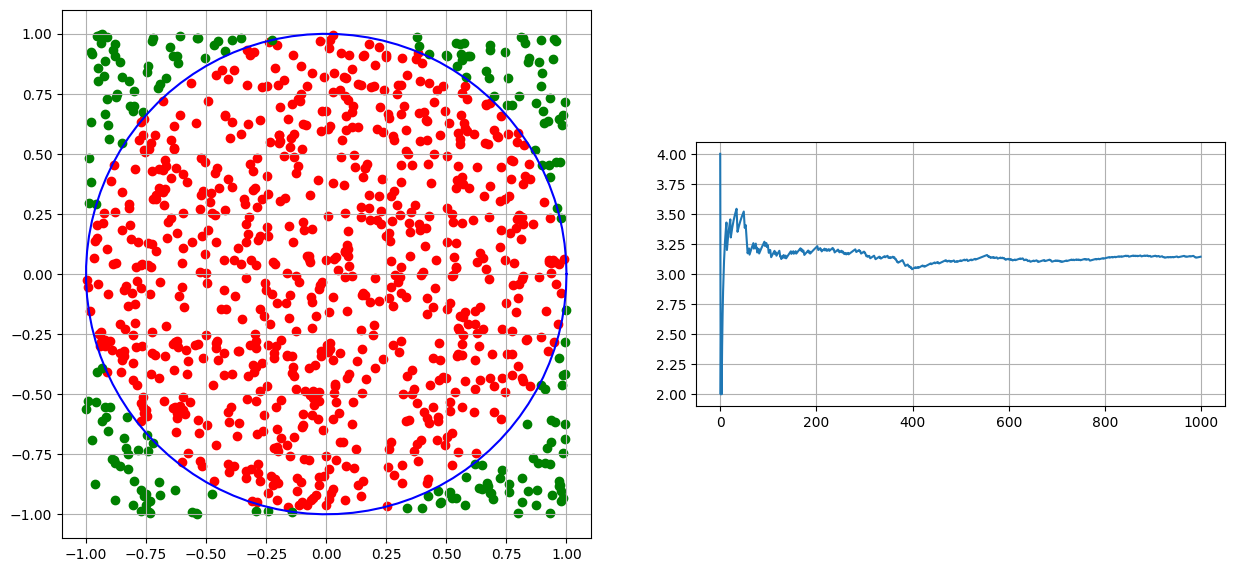

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
fig, (ax1, ax2) = plt.subplots(1, 2)

#Draw a unit circle centered at the origin
angles = np.linspace(0 * np.pi, 2 * np.pi, 100)
xs = np.cos(angles)
ys = np.sin(angles)
ax1.set_aspect(1)
ax1.plot(xs, ys, color = 'blue')

#Draw the points
x_in = np.array(x_in)
y_in = np.array(y_in)
x_out = np.array(x_out)
y_out = np.array(y_out)
ax1.scatter(x_in, y_in, color = 'r')
ax1.scatter(x_out, y_out, color = 'g')
ax1.grid()

ax2.grid()
ax2.plot(pi_est)
ax2.set_aspect(250)